# Introduction to Deep Learning in Python

> The fundamentals of neural networks and how to build deep learning models using Keras 2.0

- author: Victor Omondi
- toc: true
- comments: true
- categories: [deep-learning]

# Overview

Deep learning is the machine learning technique behind the most exciting capabilities in diverse areas like robotics, natural language processing, image recognition, and artificial intelligence, including the famous AlphaGo. We'll gain hands-on, practical knowledge of how to use deep learning with Keras 2.0, the latest version of a cutting-edge library for deep learning in Python.

# Libraries

In [1]:
%matplotlib inline

import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


## Libraries Configuration

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

plt.style.use('fivethirtyeight')

# Basics of deep learning and neural networks

We'll become familiar with the fundamental concepts and terminology used in deep learning, and understand why deep learning techniques are so powerful today. We'll build simple neural networks and generate predictions with them.

## Introduction to deeplearning

### Interactions

- Neural networks account for interactions really well
- Deep learning uses especially powerful neural networks
  - Text
  - Images
  - Videos
  - Audio
  - Source code


## Forward propagation

- Multiply - add process
- Dot product
- Forward propagation for one data point at a time
- Output is the prediction for that data point


### Forward propagation code

In [4]:
input_data = np.array([2,3])

weights = {
    'node_0': np.array([1, 1]),
    'node_1': np.array([-1, 1]),
    'output': np.array([2, -1])
}

node_0_value = (input_data*weights['node_0']).sum()
node_1_value = (input_data*weights['node_1']).sum()
hidden_layer_values = np.array([node_0_value, node_1_value])
hidden_layer_values

array([5, 1])

In [5]:
output = (hidden_layer_values*weights['output']).sum()
output

9

## Activation functions


An "activation function" is a function applied at each node. It converts the node's input into some output.
* Applied to node inputs to produce node output

### ReLU (Rectied Linear Activation)

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

$$
\mbox{RELU}(x) = \left\{
    \begin{array} \\
        0 & \mbox{if} \ x<0 \\
        x & \mbox{if} \ x>=0
    \end{array}
\right.
$$

Here are some examples:
```python
relu(3) = 3
relu(-3) = 0
```

In [13]:
input_data = np.array([-1, 2])

weights = {
    'node_0': np.array([3, 3]),
    'node_1': np.array([1, 5]),
    'output': np.array([2, -1])
}

node_0_input = (input_data*weights['node_0']).sum()
node_0_output = np.tanh(node_0_input)
node_0_output

0.9950547536867305

In [14]:
node_1_input = (input_data*weights['node_1']).sum()
node_1_output = np.tanh(node_1_input)
node_1_output

0.999999969540041

In [15]:
hidden_layer_values = np.array([node_0_output, node_1_output])
hidden_layer_values

array([0.99505475, 0.99999997])

In [16]:
output = (hidden_layer_values*weights['output']).sum()
output

0.9901095378334199

In [19]:
def relu(input_data):
    '''This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.'''
    
    return(max(input_data, 0))




In [20]:
input_data = np.array([3, 5])
weights = {
    'node_0': np.array([2, 4]), 
    'node_1': np.array([ 4, -5]), 
    'output': np.array([2, 7])
}

# node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


## Deeper networks


### Representation learning
The model training process sets weights that determine the features/interactions in Neural Networks to optimize predictive accuracy.
The last layers capture the most complex interactions.
- Deep networks internally build representations of patterns in the data
- Partially replace the need for feature engineering
- Subsequent layers build increasingly sophisticated representationsof raw data


### Deep learning

- Modeler doesn't need to specify the interactions
- When you train the model, the neural network gets weights that find the relevant patterns to make better predictions


### Multi-layer neural networks

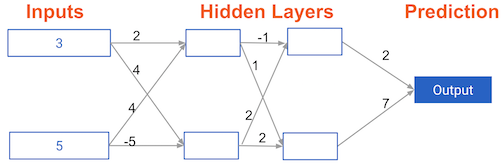

In [21]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * [2,4]).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data*[4, -5]).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs*[-1, 2]).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs*[1, 2]).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs*[2,7]).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(np.array([3, 5]))
print(output)


182


The network generated a prediction of  `182` .